In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys 
sys.path.insert(0, '../mcmc/src/')
import jsm_SHMR

from astropy.table import Table
import os
import warnings; warnings.simplefilter('ignore')
from matplotlib.colors import PowerNorm
import matplotlib.image as mpimg

from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable


sys.path.insert(0, '../../SatGen/src/')
import galhalo

In [3]:
halo_masses = np.linspace(8,12,100) # just for the model

In [4]:
mass_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

mass_example = np.vstack(mass_example)
red_example = np.vstack(red_example)

In [5]:
mass_example = np.vstack(mass_example)

red_example = np.vstack(red_example)

In [6]:
N = 200

binH = np.linspace(8,12,N)
binS = np.linspace(2,10,N)

In [7]:
def plot_SHMR_dist(theta, theta_det, save_file=None):

    stellar_example = jsm_SHMR.general(theta, mass_example, red_example)

    flat_H = mass_example.flatten()
    flat_S = stellar_example.flatten()
    nanmask = ~np.isnan(flat_H)

    galhalo.lgMs_RP17(halo_masses, 0)

    plt.figure(figsize=(8, 6))
    plt.title(label="[$M_{*}$, $\\alpha$, $\\sigma$, $\\gamma$, $\\beta$, $\\tau$] = "+str(theta), fontsize=15)
    plt.hist2d(flat_H[nanmask], flat_S[nanmask], bins=(binH, binS), norm=PowerNorm(gamma=0.15), cmap="Greys")
    plt.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses,0), color="navy", label="Deterministic Relation", lw=2)
    plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0), color="red", ls="--", label="Behroozi 2013", lw=2)
    plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0), color="orange", ls="--", label="Rodriguez+Puebla 2017", lw=2)
    plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
    plt.xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)
    #plt.legend(fontsize=15)
    if save_file !=None:
        plt.savefig("../../SatGen/mcmc/figures/paper/"+save_file)
    plt.show()

In [8]:
# theta = [10.5, 1.9, 0.2, 0, 0, 0]

# theta_det = [10.5, 1.9, 0.0, 0, 0, 0]

# plot_SHMR_dist(theta, theta_det, "complex_1.png")

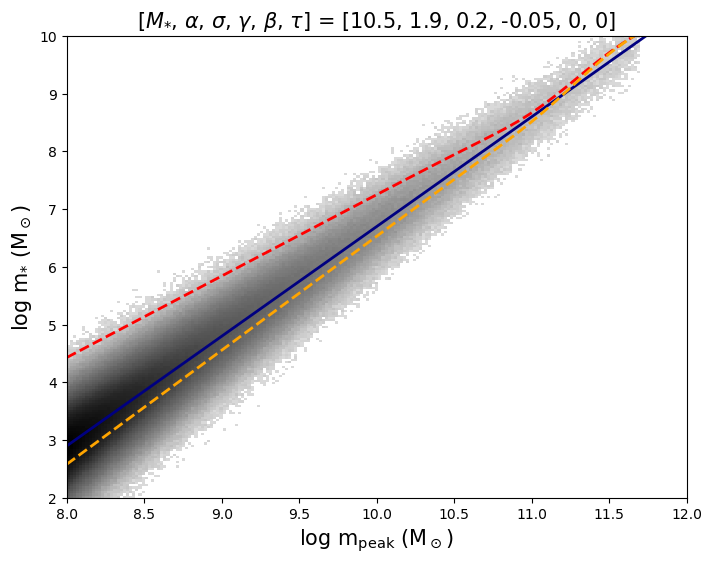

In [9]:
theta = [10.5, 1.9, 0.2, -0.05,0,0]

theta_det = [10.5, 1.9, 0.0, 0, 0, 0]

plot_SHMR_dist(theta, theta_det, "complex_2.png")

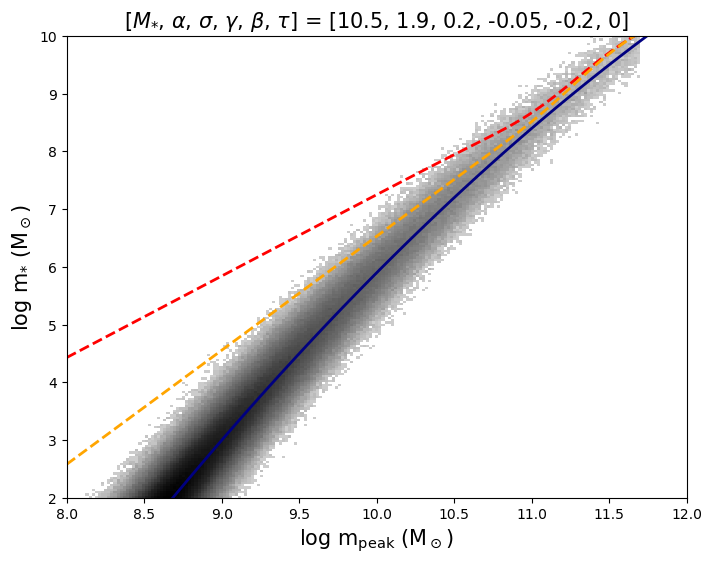

In [10]:
theta = [10.5, 1.9, 0.2, -0.05, -0.2, 0]

theta_det = [10.5, 1.9, 0, 0, -0.2, 0]

plot_SHMR_dist(theta, theta_det, "complex_3.png")

In [11]:
theta = [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

theta_det = [10.5, 1.9, 0.0, 0, 0.01, 1.2]

In [12]:
z_array = np.arange(7)

cmap = plt.get_cmap('viridis')  # You can choose a different colormap
colors = cmap(np.linspace(0, 1, z_array.shape[0]))
custom_cmap = ListedColormap(colors)

In [13]:
z_array

array([0, 1, 2, 3, 4, 5, 6])

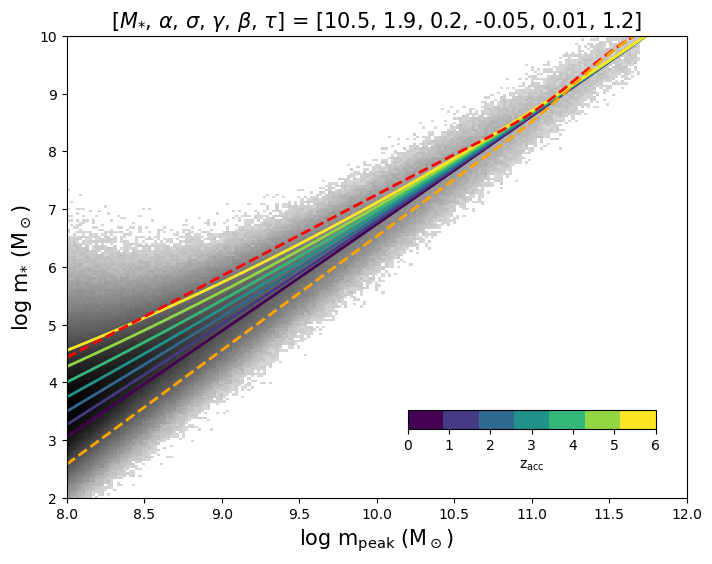

In [14]:
# Assuming you have the following imports
# import jsm_SHMR
# import galhalo

# Define the missing variables like binH, binS, theta_det, colors, z_array, custom_cmap
# ...

stellar_example = jsm_SHMR.general(theta, mass_example, red_example)

flat_H = mass_example.flatten()
flat_S = stellar_example.flatten()
nanmask = ~np.isnan(flat_H)

halo_masses = np.linspace(8,12,100) # just for the model
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("[$M_{*}$, $\\alpha$, $\\sigma$, $\\gamma$, $\\beta$, $\\tau$] = " + str(theta), fontsize=15)

wow = ax.hist2d(flat_H[nanmask], flat_S[nanmask], bins=(binH, binS), norm=PowerNorm(gamma=0.15), cmap="Greys")
for i in z_array:
    ax.plot(halo_masses, jsm_SHMR.general(theta_det, halo_masses, i), lw=2, color=colors[i])

norm = plt.Normalize(0, 6)
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])

cax = ax.inset_axes([0.55, 0.15,0.4, 0.04])
fig.colorbar(sm, cax=cax, ticks=z_array, label='z$_{\mathrm{acc}}$', orientation='horizontal')

ax.plot(halo_masses, galhalo.lgMs_B13(halo_masses, 0), color="red", ls="--", label="Behroozi 2013", lw=2)
ax.plot(halo_masses, galhalo.lgMs_RP17(halo_masses, 0), color="orange", ls="--", label="Rodriguez+Puebla 2017", lw=2)

ax.set_ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
ax.set_xlabel("log m$_{\mathrm{peak}}$ (M$_\odot$)", fontsize=15)

plt.savefig("../../SatGen/mcmc/figures/paper/complex_4.png")
plt.show()


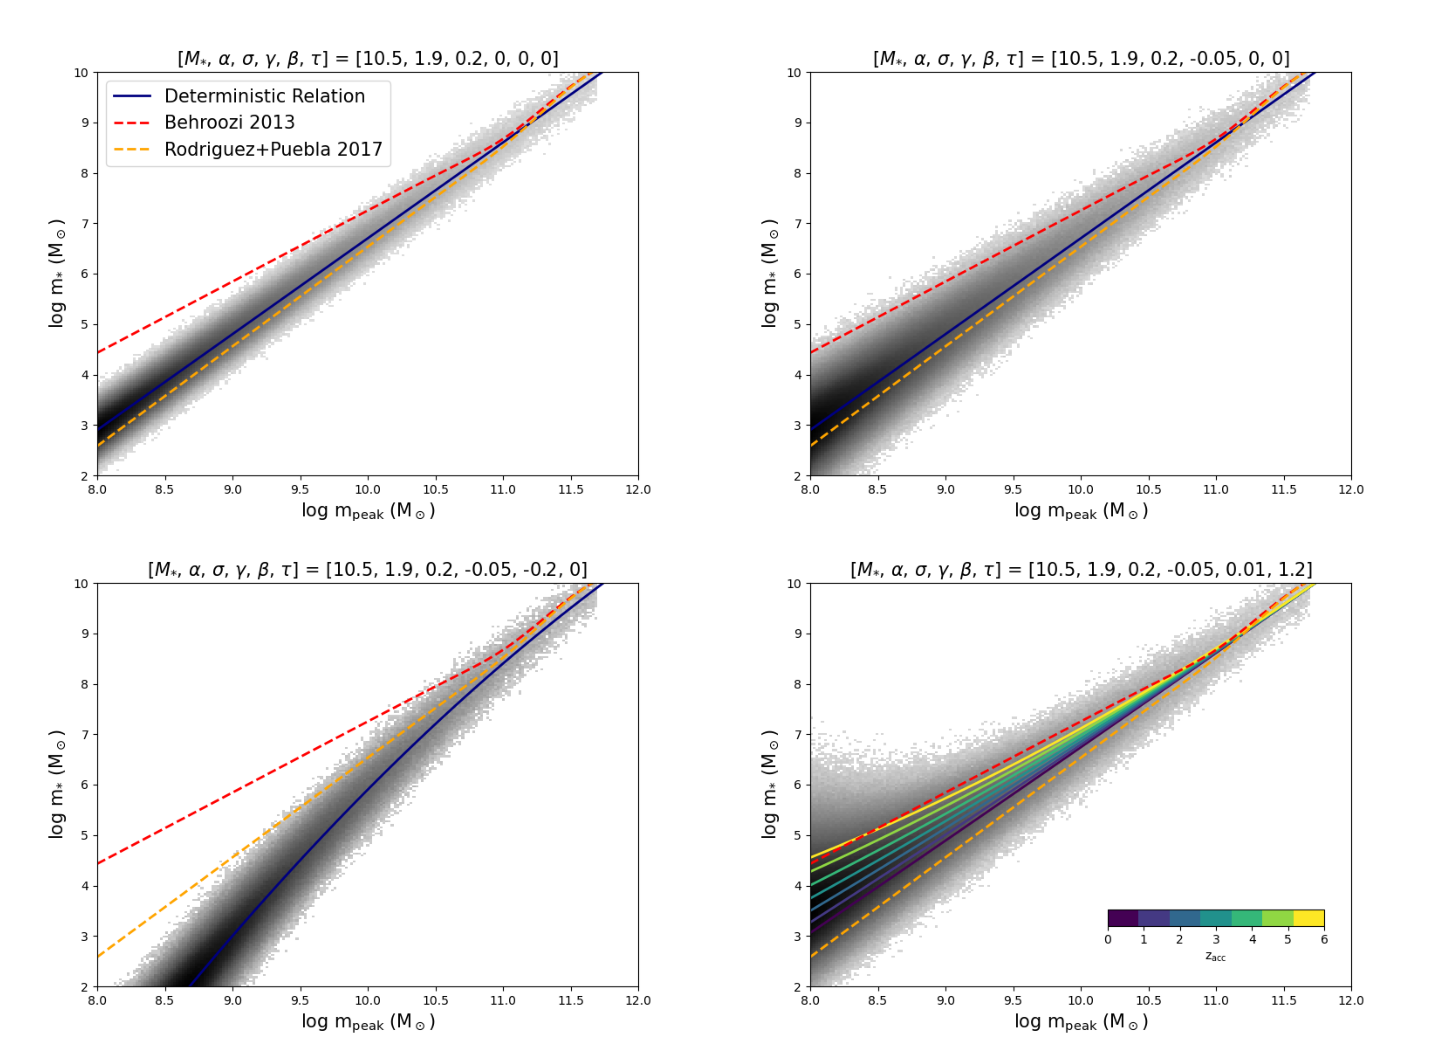

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def create_2x2_grid(images):
    fig, axs = plt.subplots(2, 2, figsize=(12,12))

    for i in range(2):
        for j in range(2):
            img = mpimg.imread(images[i * 2 + j])
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
    fig.set_in_layout(False)
    plt.tight_layout(rect=[0, 0, 1.2, 0.95])
    plt.show() 

datadir = "../../SatGen/mcmc/figures/paper/"

if __name__ == "__main__":
    # Replace these file paths with your own PNG files
    image_paths = [datadir+"complex_1.png", datadir+"complex_2.png", datadir+"complex_3.png", datadir+"complex_4.png"]

    create_2x2_grid(image_paths)


In [ ]:
stop

In [ ]:
# def master_SHMR_1D(lgMh, alpha=1.82, delta=0, sigma=None, N_samples=1000, GK_norm=False, beta_norm=False):

#     """_summary_

#     a flexible Stellar to Halo Mass Relation that has a few tricks up its sleeve
#     Returns:
#         numpy array: stellar masses!
#     """

#     M_star_a = 10 # these are the anchor points
#     M_halo_a = 11.67

#     if sigma != None:
#         print("randomly sampling the lognormal PDF", N_samples, "times")

#         if GK_norm == True:
#             alpha_norm = 0.14*sigma**2 + 0.14*sigma+ 1.79
#             lgMs = alpha_norm*(lgMh-M_halo_a)  - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter
        
#         if beta_norm == True:
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter - (sigma**2)/4.605
        
#         else:
#             print("not normalizing for the upscatter")
#             lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#             scatter = np.random.normal(loc=0, scale=sigma, size=(N_samples, lgMs.shape[0]))
#             return lgMs + scatter

#     else:
#         print("assuming a deterministic SHMR")
#         lgMs = alpha*(lgMh-M_halo_a) - delta*(lgMh-M_halo_a)**2 + M_star_a
#         return lgMs